In [1]:
#dependencys

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255
)

In [3]:
# Load data
train_data_dir = 'mdata3'
batch_size = 32
img_height = 150
img_width = 150
num_classes = 4

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 800 images belonging to 4 classes.


In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size
)

Epoch 1/50
25/25 [==============================] - 35s 1s/step - loss: 1.2657 - accuracy: 0.3738
Epoch 2/50
25/25 [==============================] - 32s 1s/step - loss: 1.0088 - accuracy: 0.5300
Epoch 3/50
25/25 [==============================] - 31s 1s/step - loss: 0.8762 - accuracy: 0.6275
Epoch 4/50
25/25 [==============================] - 32s 1s/step - loss: 0.7743 - accuracy: 0.6825
Epoch 5/50
25/25 [==============================] - 31s 1s/step - loss: 0.7395 - accuracy: 0.7125
Epoch 6/50
25/25 [==============================] - 31s 1s/step - loss: 0.5574 - accuracy: 0.7987
Epoch 7/50
25/25 [==============================] - 37s 1s/step - loss: 0.4847 - accuracy: 0.8263
Epoch 8/50
25/25 [==============================] - 35s 1s/step - loss: 0.4353 - accuracy: 0.8425
Epoch 9/50
25/25 [==============================] - 32s 1s/step - loss: 0.4326 - accuracy: 0.8438
Epoch 10/50
25/25 [==============================] - 31s 1s/step - loss: 0.5082 - accuracy: 0.8238
Epoch 11/50
25/25 [

In [7]:
model.save("mango.h5")

C:\Users\anton\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Load the trained model
from tensorflow.keras.models import load_model

model = load_model("mango.h5")

# Evaluate the model on the test data
test_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Set shuffle to False for evaluation
)

# Evaluate the model
scores = model.evaluate(test_generator)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

# Predict classes for the test data
predicted_classes = model.predict(test_generator)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Get true classes
true_classes = test_generator.classes

# Calculate precision
from sklearn.metrics import precision_score

precision = precision_score(true_classes, predicted_classes, average='weighted')
print("Precision:", precision)

Found 800 images belonging to 4 classes.
25/25 [==============================] - 19s 739ms/step - loss: 0.0949 - accuracy: 0.9675
Test Loss: 0.09486536681652069
Test Accuracy: 0.9674999713897705
25/25 [==============================] - 18s 698ms/step
Precision: 0.9675715729249155


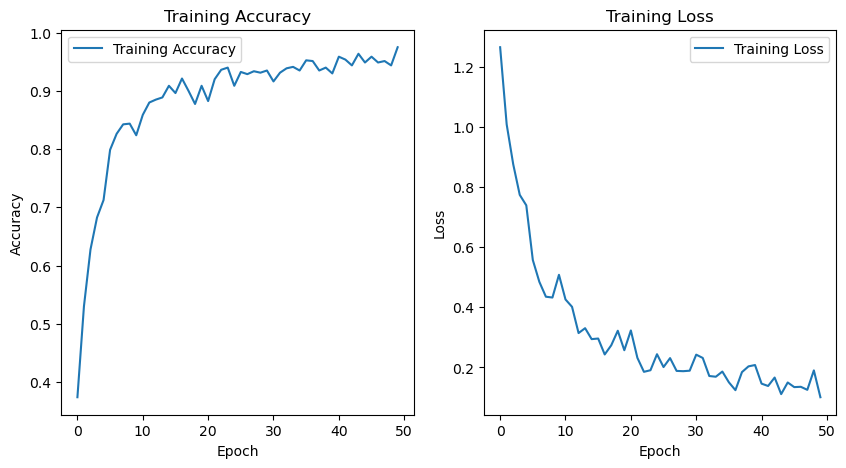

In [9]:
# Plotting accuracy and loss over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

25/25 [==============================] - 18s 712ms/step


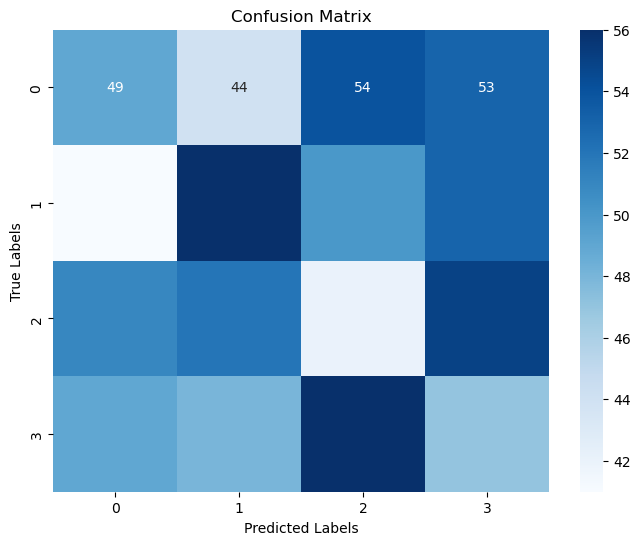

In [10]:
# Confusion Matrix
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(train_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 1s 544ms/step


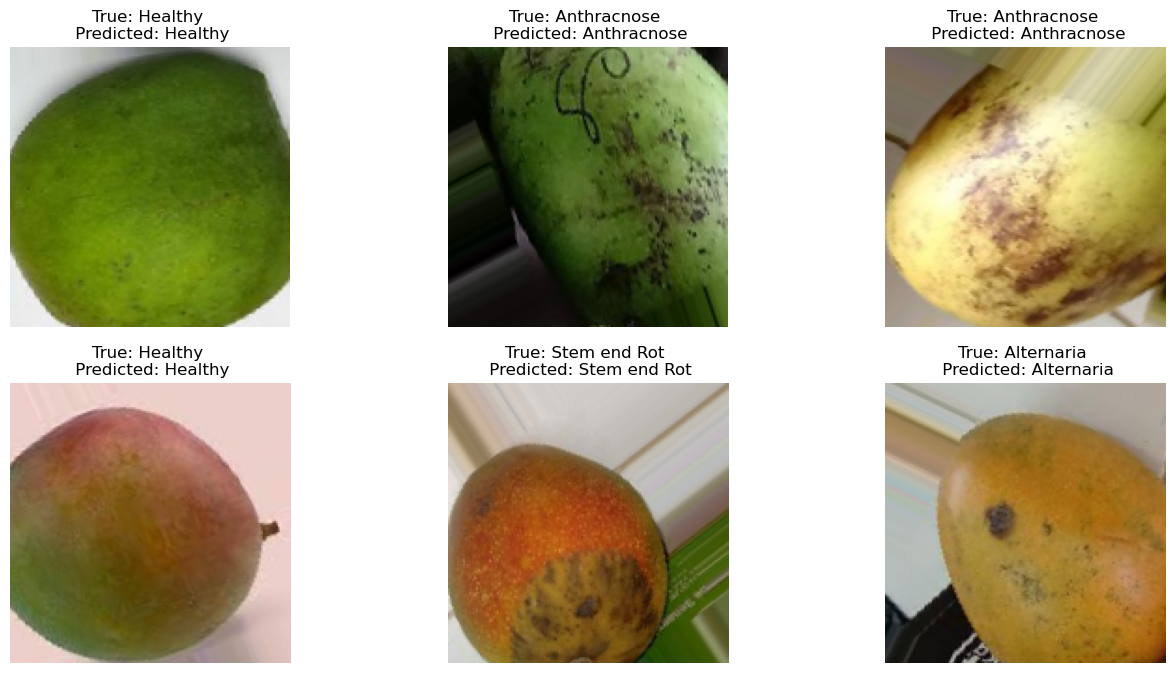

In [12]:
# Example Predictions

example_images, example_labels = next(train_generator)
example_predictions = model.predict(example_images)
example_predicted_labels = np.argmax(example_predictions, axis=1)

plt.figure(figsize=(16, 8))
for i in range(min(len(example_images), 6)):  # Loop through only 6 images or less if there are fewer than 6 images
    plt.subplot(2, 3, i + 1)  # Changed to show 2 rows and 3 columns
    plt.imshow(example_images[i])
    plt.title(f'True: {class_labels[np.argmax(example_labels[i])]} \n Predicted: {class_labels[example_predicted_labels[i]]}')
    plt.axis('off')
plt.show()